This is where I am going to write out my code for this project.

Louisville Animal Shelter Data: https://data.louisvilleky.gov/datasets/louisville-metro-ky-animal-service-intake-and-outcome/about
Nationwide Animal Shelter Data: https://www.shelteranimalscount.org/data-request-free-download/
Dallas Animal Shelter Data: https://www.dallasopendata.com/Services/Dallas-Animal-Shelter-Data-Fiscal-Year-2022-2023/f77p-sgrc/about_data


In [1]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import pandas as pd
import numpy as np


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Melis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Melis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv('Animal_IO_Data.csv')

print(df.head())

    kennel animalid jurisdiction     intype insubtype               indate  \
0     ID08  A673162        40208      STRAY     FIELD  2021-02-21 00:00:00   
1  FREEZER  A617968        40215  OWNER SUR     FIELD  2022-12-14 00:00:00   
2      N40  A688268        40213  OWNER SUR       OTC  2021-01-19 00:00:00   
3     DW19  A688176        40258     FOSTER    RETURN  2021-01-22 00:00:00   
4   FOSTER  A688325        40218      STRAY       OTC  2021-01-21 00:00:00   

    surreason   outtype  outsubtype              outdate animaltype sex bites  \
0       STRAY       RTO   IN KENNEL  2021-02-21 00:00:00        DOG   N     N   
1       STRAY      EUTH   REQUESTED  2022-12-14 00:00:00        DOG   F     N   
2   OTHER PET  ADOPTION     WALK IN  2021-01-22 00:00:00        CAT   S     N   
3  OWNER DIED  TRANSFER  RESCUE GRP  2021-01-23 00:00:00        DOG   S     N   
4       STRAY    FOSTER         NaN  2021-01-26 00:00:00        DOG   S     N   

  petsize          color            breed so

Want to import another city's data, to have a closer comparison.  I was seeing an erorr with the data before importing, so I did research and found the "usecols" function.

In [4]:
columns_to_include = ['Animal Type', 'Animal Breed', 'Intake Type', 'Intake Subtype', 'Intake Date', 'Outcome Type', 'Outcome Subtype', 'Month', 'Year']
df3 = pd.read_csv('Dallas_Animal_Shelter_Data_Fiscal_Year_2022_-_2023.csv', usecols=columns_to_include)
print(df3)


      Animal Type   Animal Breed      Intake Type Intake Subtype Intake Date  \
0             DOG  LABRADOR RETR       DISPOS REQ            OTC  03/01/2023   
1             DOG    MIXED BREED  OWNER SURRENDER        APPOINT  07/05/2023   
2             DOG    MIXED BREED            STRAY       AT LARGE  01/15/2023   
3             DOG     POODLE MIN            STRAY       AT LARGE  03/09/2023   
4             DOG  SCHNAUZER MIN         TRANSFER          STRAY  11/08/2022   
...           ...            ...              ...            ...         ...   
34801         CAT    DOMESTIC SH           FOSTER           DIED  06/18/2023   
34802         CAT    DOMESTIC SH        TREATMENT        ILLNESS  06/25/2023   
34803         CAT    DOMESTIC SH        TREATMENT        ILLNESS  07/06/2023   
34804         CAT    DOMESTIC SH           FOSTER        APPOINT  07/10/2023   
34805         CAT    DOMESTIC SH            STRAY       AT LARGE  06/01/2023   

            Outcome Type Outcome Subtyp

In [5]:
df2 = pd.read_excel('3 year 21-22-23 SAC Agg.xlsx')
print(df2.head)

<bound method NDFrame.head of     State  Year  Organizations  Intake - Relinquished By Owner Total-Feline  \
0      AK  2021              5                                          886   
1      AK  2022              5                                         1128   
2      AK  2023              5                                          911   
3      AL  2021             17                                         1548   
4      AL  2022             17                                         1419   
..    ...   ...            ...                                          ...   
148    WV  2022             14                                         1062   
149    WV  2023             14                                         1253   
150    WY  2021              9                                          975   
151    WY  2022              9                                         1135   
152    WY  2023              9                                         1302   

     Intake - Stray A

In [6]:
df.drop(columns=['kennel', 'animalid', 'jurisdiction', 'sex', 'color', 'breed', 'sourcezipcode', 'ObjectId'], inplace=True)
df = df.dropna()
print (df)

          intype insubtype               indate   surreason   outtype  \
0          STRAY     FIELD  2021-02-21 00:00:00       STRAY       RTO   
1      OWNER SUR     FIELD  2022-12-14 00:00:00       STRAY      EUTH   
2      OWNER SUR       OTC  2021-01-19 00:00:00   OTHER PET  ADOPTION   
3         FOSTER    RETURN  2021-01-22 00:00:00  OWNER DIED  TRANSFER   
5      OWNER SUR  EUTH REQ  2021-09-03 00:00:00       BITES      EUTH   
...          ...       ...                  ...         ...       ...   
52660      STRAY       OTC  2024-08-16 00:00:00       STRAY       RTO   
52661  OWNER SUR       OTC  2024-11-09 00:00:00    EUTH OLD      EUTH   
52664      STRAY     FIELD  2024-12-28 00:00:00       STRAY       TNR   
52665      STRAY       OTC  2024-11-25 00:00:00       STRAY  ADOPTION   
52669      STRAY       OTC  2024-12-05 00:00:00       STRAY  ADOPTION   

       outsubtype              outdate animaltype bites petsize  
0       IN KENNEL  2021-02-21 00:00:00        DOG     N  

In [7]:
df['indate'] = pd.to_datetime(df['indate'])
df_remove =df[~df['indate'].dt.year.isin([2024, 2025])]
df['outdate'] = pd.to_datetime(df['outdate'])
df_remove =df[~df['outdate'].dt.year.isin([2024, 2025])]
print(df)

          intype insubtype     indate   surreason   outtype  outsubtype  \
0          STRAY     FIELD 2021-02-21       STRAY       RTO   IN KENNEL   
1      OWNER SUR     FIELD 2022-12-14       STRAY      EUTH   REQUESTED   
2      OWNER SUR       OTC 2021-01-19   OTHER PET  ADOPTION     WALK IN   
3         FOSTER    RETURN 2021-01-22  OWNER DIED  TRANSFER  RESCUE GRP   
5      OWNER SUR  EUTH REQ 2021-09-03       BITES      EUTH   REQUESTED   
...          ...       ...        ...         ...       ...         ...   
52660      STRAY       OTC 2024-08-16       STRAY       RTO   IN KENNEL   
52661  OWNER SUR       OTC 2024-11-09    EUTH OLD      EUTH   REQUESTED   
52664      STRAY     FIELD 2024-12-28       STRAY       TNR   CARETAKER   
52665      STRAY       OTC 2024-11-25       STRAY  ADOPTION       EVENT   
52669      STRAY       OTC 2024-12-05       STRAY  ADOPTION     WALK IN   

         outdate animaltype bites petsize  
0     2021-02-21        DOG     N   LARGE  
1     2022-

##dff = pd.DataFrame(data)

word_to_drop = "Outcome"
df2 = df2.loc[:, ~df2.columns.str.contains(word_to_drop)]

##print("Updated colums")
##print(df2)


intake_columns = df2.filter(like='Intake' , axis=1)
df2['Total Intake'] = intake_columns.sum(axis=1)
print(df2)

df2_grouping = df2.groupby('State' , as_index=False)['Total Intake'].sum()
print("Grouped by state and sum total:")
print(df2_grouping)

In [8]:
df2.drop(columns=['Organizations', 'Year'], inplace=True)

print(df2)

    State  Intake - Relinquished By Owner Total-Feline  \
0      AK                                          886   
1      AK                                         1128   
2      AK                                          911   
3      AL                                         1548   
4      AL                                         1419   
..    ...                                          ...   
148    WV                                         1062   
149    WV                                         1253   
150    WY                                          975   
151    WY                                         1135   
152    WY                                         1302   

     Intake - Stray At Large Total-Feline  \
0                                    1620   
1                                    1878   
2                                    1814   
3                                    3414   
4                                    3400   
..                               

I am going to combine all the intake columns into one, and do the same for the outtake columns.  I did use AI to help with this.


In [9]:
intake_columns = [col for col in df2.columns if 'Intake' in col]
df2['Combined_National_Intake'] = df2[intake_columns].sum(axis=1)
outtake_columns = [col for col in df2.columns if 'Outcome' in col]
df2['Combined_National_Outcome'] = df2[outtake_columns].sum(axis=1)
print(df2)

    State  Intake - Relinquished By Owner Total-Feline  \
0      AK                                          886   
1      AK                                         1128   
2      AK                                          911   
3      AL                                         1548   
4      AL                                         1419   
..    ...                                          ...   
148    WV                                         1062   
149    WV                                         1253   
150    WY                                          975   
151    WY                                         1135   
152    WY                                         1302   

     Intake - Stray At Large Total-Feline  \
0                                    1620   
1                                    1878   
2                                    1814   
3                                    3414   
4                                    3400   
..                               

In [10]:
df2_grouping = df2.groupby('State' , as_index=False)['Combined_National_Intake'].sum()
df2_grouping2 = df2.groupby('State' , as_index=False)['Combined_National_Outcome'].sum()
df2_grouped = pd.merge(df2_grouping, df2_grouping2, on='State')
print("Grouped by state and sum total:")
print(df2_grouped)

Grouped by state and sum total:
   State  Combined_National_Intake  Combined_National_Outcome
0     AK                     15570                      15566
1     AL                     66126                      68283
2     AR                     36446                      36171
3     AZ                    246363                     253112
4     CA                    950787                     940923
5     CO                    265431                     266580
6     CT                     13538                      12989
7     DE                      5000                       5137
8     FL                    447934                     454275
9     GA                    190386                     185596
10    HI                     62703                      59591
11    IA                     65672                      65714
12    ID                     88248                      90358
13    IL                    129721                     128598
14    IN                    153953    

In [11]:
# You might want to add a prefix or suffix to each dataset's columns for clarity
df.columns = ['Louisville_' + col for col in df.columns]
df3.columns = ['Dallas_' + col for col in df3.columns]

# Now concatenate
merged_df = pd.concat([df, df3], axis=1)

# Display the merged result
print(merged_df)


      Louisville_intype Louisville_insubtype Louisville_indate  \
0                 STRAY                FIELD        2021-02-21   
1             OWNER SUR                FIELD        2022-12-14   
2             OWNER SUR                  OTC        2021-01-19   
3                FOSTER               RETURN        2021-01-22   
5             OWNER SUR             EUTH REQ        2021-09-03   
...                 ...                  ...               ...   
34789               NaN                  NaN               NaT   
34791               NaN                  NaN               NaT   
34798               NaN                  NaN               NaT   
34803               NaN                  NaN               NaT   
34804               NaN                  NaN               NaT   

      Louisville_surreason Louisville_outtype Louisville_outsubtype  \
0                    STRAY                RTO             IN KENNEL   
1                    STRAY               EUTH             REQUEST

combined_df = pd.concat([df, df3], axis=0, ignore_index=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(combined_df)

combined_df_filled = combined_df.fillna("")
print(combined_df_filled)

In [12]:
##merged_df.to_csv('combined_data5.csv', index=False)

In [13]:
louisville_animal_count = merged_df['Louisville_animaltype'].value_counts()
dallas_animal_count = merged_df['Dallas_Animal Type'].value_counts()
print("Louisville Animal Type Counts:")
print(louisville_animal_count)
print("\nDallas Animal Type Counts:")
print(dallas_animal_count)


Louisville Animal Type Counts:
Louisville_animaltype
DOG           18978
CAT           13051
RABBIT          295
OTHER           232
BIRD             77
LIVESTOCK        33
GUINEA PIG       26
Name: count, dtype: int64

Dallas Animal Type Counts:
Dallas_Animal Type
DOG          22924
CAT           7685
BIRD          3396
WILDLIFE       772
LIVESTOCK       29
Name: count, dtype: int64


In [14]:
louisville_mode = merged_df['Louisville_animaltype'].mode()[0]
dallas_mode = merged_df['Dallas_Animal Type'].mode()[0]

print(f"Most common Louisville Animal Type: {louisville_mode}")
print(f"Most common Dallas Animal Type: {dallas_mode}")

Most common Louisville Animal Type: DOG
Most common Dallas Animal Type: DOG


In [15]:
print("Louisville Animal Type Counts:")
print(louisville_animal_count)
print("\nDallas Animal Type Counts:")
print(dallas_animal_count)

Louisville Animal Type Counts:
Louisville_animaltype
DOG           18978
CAT           13051
RABBIT          295
OTHER           232
BIRD             77
LIVESTOCK        33
GUINEA PIG       26
Name: count, dtype: int64

Dallas Animal Type Counts:
Dallas_Animal Type
DOG          22924
CAT           7685
BIRD          3396
WILDLIFE       772
LIVESTOCK       29
Name: count, dtype: int64


In [16]:
import matplotlib.pyplot as plt
louisville_animal_count = merged_df['Louisville_animaltype'].value_counts()
dallas_animal_count = merged_df['Dallas_Animal Type'].value_counts()

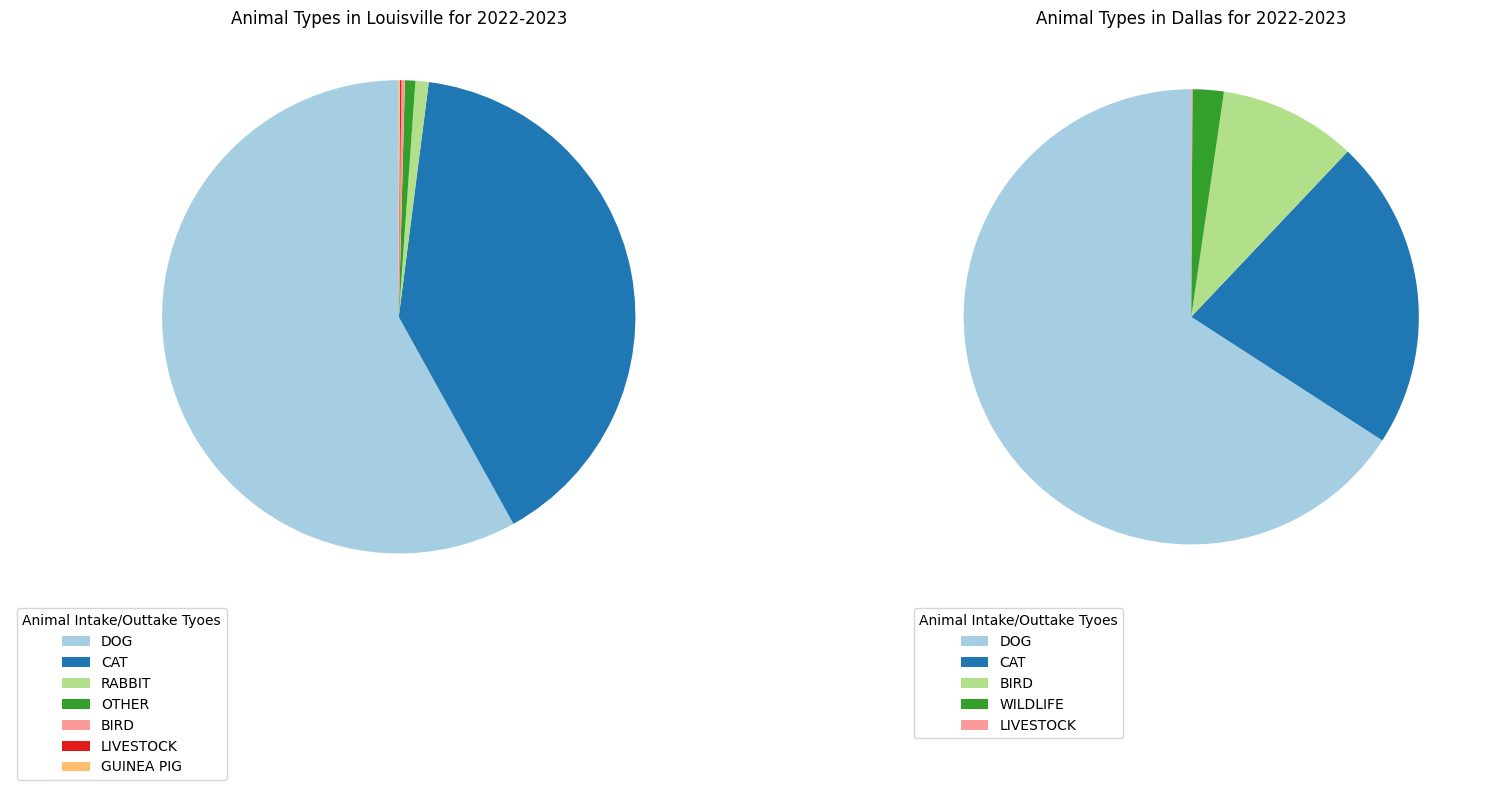

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
patches, texts = ax1.pie(
    louisville_animal_count, 
    autopct= None, 
    startangle=90,
    colors=plt.cm.Paired.colors,
    labels=None
)
ax1.set_title('Animal Types in Louisville for 2022-2023')
ax1.legend(patches, louisville_animal_count.index, title="Animal Intake/Outtake Tyoes", loc="upper left", bbox_to_anchor=(0,0))
ax1.axis('equal') 
patches2, texts2 = ax2.pie(
    dallas_animal_count, 
    autopct= None, 
    startangle=90,
    colors=plt.cm.Paired.colors, 
    labels=None
)
ax2.set_title('Animal Types in Dallas for 2022-2023')
ax2.legend(patches, dallas_animal_count.index, title="Animal Intake/Outtake Tyoes", loc="upper left", bbox_to_anchor=(0,0))
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [18]:
louisville_outcome_count = merged_df['Louisville_outtype'].value_counts()
dallas_outcome_count = merged_df['Dallas_Outcome Type'].value_counts()
print("Louisville Outcome Counts:")
print(louisville_outcome_count)
print("\nDallas Outcome Counts:")
print(dallas_outcome_count)

Louisville Outcome Counts:
Louisville_outtype
ADOPTION     11878
FOSTER        6542
RTO           4586
TRANSFER      3678
EUTH          2552
TNR           2161
DISPOSAL       586
DIED           381
TRANSPORT      297
LOST            30
RELEASE          1
Name: count, dtype: int64

Dallas Outcome Counts:
Dallas_Outcome Type
ADOPTION             8829
EUTHANIZED           7752
FOSTER               4261
LOST EXP             3544
TRANSFER             3481
RETURNED TO OWNER    2857
TREATMENT            1452
FOUND EXP            1386
DIED                  484
WILDLIFE              302
DISPOSAL              242
SNR                   172
MISSING                42
OTHER                   2
Name: count, dtype: int64


In [19]:
louisville_total = louisville_outcome_count.sum()
dallas_total = dallas_outcome_count.sum()
louisville_percentage = (louisville_outcome_count / louisville_total) * 100
dallas_percentage = (dallas_outcome_count / dallas_total) * 100
print ("Louisville Outcome Percentages of Total:")
print(louisville_percentage)
print ("Dallas Outcome Percentages of Total:")
print(dallas_percentage)

Louisville Outcome Percentages of Total:
Louisville_outtype
ADOPTION     36.333048
FOSTER       20.011012
RTO          14.027897
TRANSFER     11.250459
EUTH          7.806191
TNR           6.610180
DISPOSAL      1.792487
DIED          1.165423
TRANSPORT     0.908479
LOST          0.091766
RELEASE       0.003059
Name: count, dtype: float64
Dallas Outcome Percentages of Total:
Dallas_Outcome Type
ADOPTION             25.366316
EUTHANIZED           22.272022
FOSTER               12.242142
LOST EXP             10.182153
TRANSFER             10.001149
RETURNED TO OWNER     8.208355
TREATMENT             4.171695
FOUND EXP             3.982072
DIED                  1.390565
WILDLIFE              0.867666
DISPOSAL              0.695282
SNR                   0.494168
MISSING               0.120669
OTHER                 0.005746
Name: count, dtype: float64


This code below took a lot of research and tweaking.  It may seem repetitive, but I finally got it to work to my satisfaction!

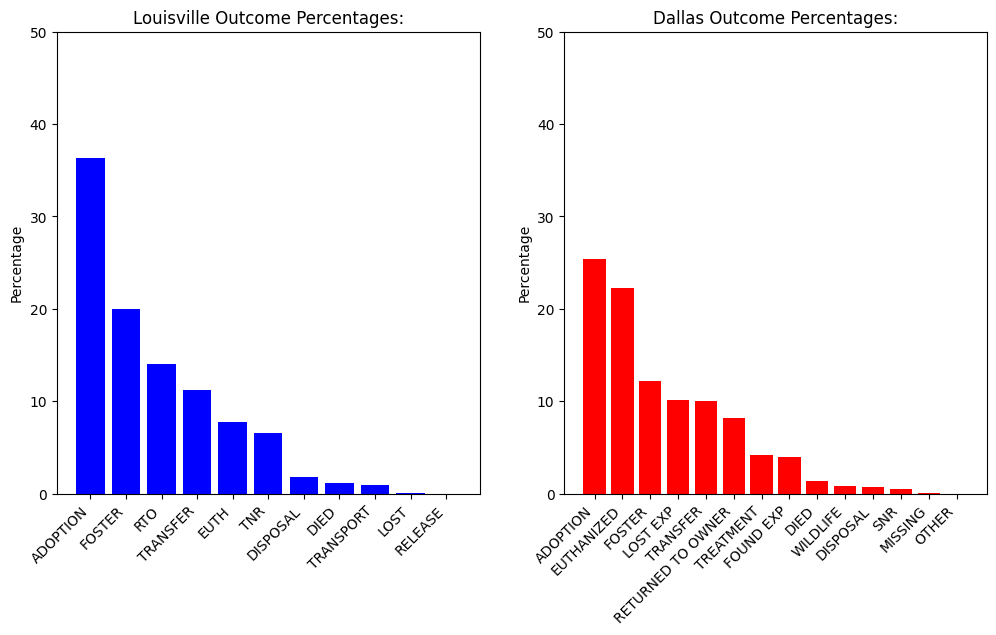

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].bar(louisville_percentage.index, louisville_percentage, color='blue')
axes[0].set_title("Louisville Outcome Percentages:")
axes[0].set_xticks(range(len(louisville_percentage.index)))  
axes[0].set_xticklabels(louisville_percentage.index, rotation=45, ha='right')
axes[0].set_ylim(0, 50)
axes[0].set_ylabel("Percentage")
axes[0].tick_params(axis='y', which='both', labelleft=True)
axes[1].bar(dallas_percentage.index, dallas_percentage, color='red')
axes[1].set_title("Dallas Outcome Percentages:")
axes[1].set_xticks(range(len(dallas_percentage.index)))  
axes[1].set_xticklabels(dallas_percentage.index, rotation=45, ha='right')
axes[1].set_ylim(0, 50)
axes[1].set_ylabel("Percentage")
axes[1].tick_params(axis='y', which='both', labelleft=True)

plt.tight_layout
plt.show()
